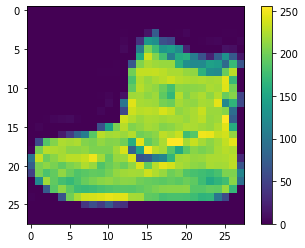

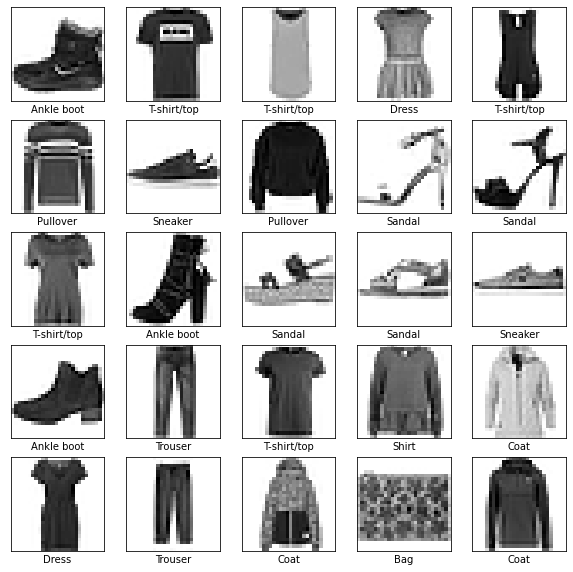

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4939 - accuracy: 0.8270
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3742 - accuracy: 0.8626
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3379 - accuracy: 0.8757
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3133 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2953 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2822 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2679 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2569 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2479 - accuracy: 0.9061
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.239

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
train_images = train_images / 255.0
test_images = test_images / 255.0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)
model.save_weights("name")

In [6]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
for i in range(len(predictions)):
  print("My Prediction is :",np.argmax(predictions[i]),"which mean it is probably a:",class_names[np.argmax(predictions[i])])

Streaming output truncated to the last 5000 lines.
My Prediction is : 2 which mean it is probably a: Pullover
My Prediction is : 3 which mean it is probably a: Dress
My Prediction is : 0 which mean it is probably a: T-shirt/top
My Prediction is : 4 which mean it is probably a: Coat
My Prediction is : 4 which mean it is probably a: Coat
My Prediction is : 3 which mean it is probably a: Dress
My Prediction is : 3 which mean it is probably a: Dress
My Prediction is : 9 which mean it is probably a: Ankle boot
My Prediction is : 4 which mean it is probably a: Coat
My Prediction is : 7 which mean it is probably a: Sneaker
My Prediction is : 0 which mean it is probably a: T-shirt/top
My Prediction is : 8 which mean it is probably a: Bag
My Prediction is : 3 which mean it is probably a: Dress
My Prediction is : 5 which mean it is probably a: Sandal
My Prediction is : 6 which mean it is probably a: Shirt
My Prediction is : 4 which mean it is probably a: Coat
My Prediction is : 0 which mean it i

In [7]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

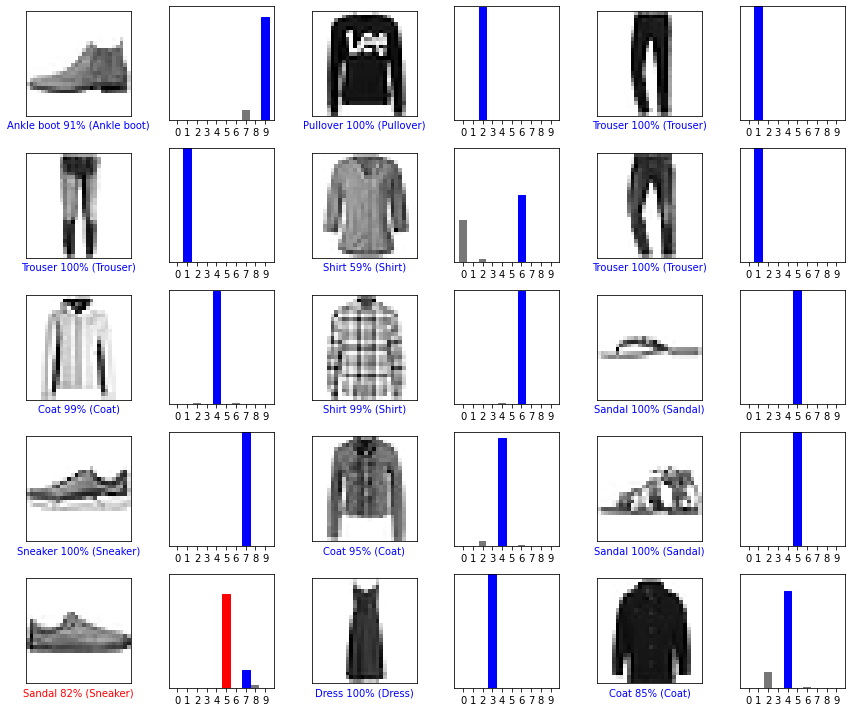

In [8]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()